**Data Architecture project** \
Master's degree course in Computer Science \
University of Milan - Bicocca \
A.Y. 2023-2024 \
\
Cavaleri Matteo - 875050 \
Gargiulo Elio - 869184 \
Piacente Cristian - 866020

# Preliminary analysis

## Import aggregated csv

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the aggregated metrics
df = pd.read_csv('../experiments_pipeline/aggregated_metrics.csv')

In [5]:
df.head()

,experiment_name,model_name,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
0,experiment #1,SVM,0.740321,0.743926,0.745027,0.740321,0.371963,0.372513,1.000000,NaN,NaN,0.850787,0.426581,0.426943
1,experiment #1,Neural Network,0.809254,0.838447,0.853348,0.816993,0.855759,0.868357,0.956633,0.937439,0.950937,0.881316,0.896504,0.905928
2,experiment #1,Decision Tree,0.787535,0.788408,0.808945,0.865359,0.723522,0.749238,0.844388,0.726241,0.749991,0.854745,0.724852,0.748685
3,experiment #2,SVM,0.979226,0.975209,0.984755,0.978643,0.971815,0.985081,0.993622,0.961223,0.976450,0.986076,0.967081,0.979755
4,experiment #2,Neural Network,0.977337,0.978805,0.986820,0.988432,0.981618,0.992195,0.980867,0.987771,0.992441,0.984635,0.985827,0.991146


In [6]:
# Add a new column experiment_id in the first position and drop experiment_name
df.insert(loc=0, column='experiment_id', value=df['experiment_name'].str.extract(r'#(\d+)').astype(int))
df.drop(columns=['experiment_name'], inplace=True)

In [7]:
df.head()

,experiment_id,model_name,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
0,1,SVM,0.740321,0.743926,0.745027,0.740321,0.371963,0.372513,1.000000,NaN,NaN,0.850787,0.426581,0.426943
1,1,Neural Network,0.809254,0.838447,0.853348,0.816993,0.855759,0.868357,0.956633,0.937439,0.950937,0.881316,0.896504,0.905928
2,1,Decision Tree,0.787535,0.788408,0.808945,0.865359,0.723522,0.749238,0.844388,0.726241,0.749991,0.854745,0.724852,0.748685
3,2,SVM,0.979226,0.975209,0.984755,0.978643,0.971815,0.985081,0.993622,0.961223,0.976450,0.986076,0.967081,0.979755
4,2,Neural Network,0.977337,0.978805,0.986820,0.988432,0.981618,0.992195,0.980867,0.987771,0.992441,0.984635,0.985827,0.991146


In [8]:
# Make sure each metric is between 0 and 1 (for the 95% confidence intervals)
for col in df.columns[2:]:
    df[col] = df[col].clip(0, 1)

## Sub-DataFrames by model name

In [9]:
# Create different DataFrames, one for each model

model_names = df['model_name'].unique()

sub_df_dict = {
    model_name: df[df['model_name'] == model_name]
    for model_name in model_names
}

## Describe

In [10]:
df.describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2187.000000,2187.000000,2201.000000,1975.000000,1975.000000,2201.000000,2187.000000,2187.000000
mean,304.639709,0.854638,0.877778,0.890307,0.869227,0.835562,0.852425,0.898623,0.889221,0.905596,0.876516,0.838748,0.852343
std,198.858469,0.219765,0.140160,0.136744,0.231792,0.211637,0.208359,0.254357,0.166375,0.159403,0.240810,0.207819,0.205113
min,1.000000,0.016997,0.088087,0.105386,0.000000,0.000000,0.103404,0.000000,0.000000,0.004010,0.000000,0.000000,0.007938
25%,113.000000,0.745042,0.792038,0.811735,0.774704,0.770017,0.798653,0.973214,0.886984,0.909521,0.851550,0.763943,0.786215
50%,295.000000,0.971671,0.969357,0.979147,0.979849,0.959339,0.975411,0.988520,0.963280,0.977949,0.980964,0.961449,0.974515
75%,479.000000,0.979226,0.979791,0.987398,0.987163,0.976944,0.988043,0.994898,0.980929,0.990403,0.986076,0.976016,0.986242
max,659.000000,0.985836,0.994315,0.998133,1.000000,0.995063,0.999380,1.000000,0.999307,1.000000,0.990440,0.996188,0.998744


In [11]:
# SVM DataFrame
sub_df_dict['SVM'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,342.000000,342.000000,547.000000,547.000000,547.000000
mean,381.021938,0.799511,0.833819,0.841496,0.784334,0.692303,0.704457,0.892647,0.862482,0.879881,0.830496,0.696829,0.707601
std,160.083047,0.241978,0.132511,0.133955,0.282365,0.279695,0.283610,0.300819,0.152529,0.149625,0.285025,0.251429,0.255823
min,1.000000,0.016997,0.501505,0.509234,0.000000,0.212752,0.254617,0.000000,0.490113,0.499903,0.000000,0.337015,0.337412
25%,245.500000,0.740321,0.743926,0.745027,0.740321,0.371963,0.372513,0.993622,0.737199,0.761408,0.850787,0.426581,0.426943
50%,382.000000,0.810198,0.799174,0.811088,0.858506,0.777206,0.804001,0.993622,0.961052,0.976541,0.886376,0.687591,0.716292
75%,518.500000,0.979226,0.975655,0.985109,0.979221,0.972340,0.985215,1.000000,0.963280,0.977997,0.986076,0.967544,0.980118
max,658.000000,0.983003,0.982697,0.987721,0.996769,0.980613,0.987216,1.000000,0.979591,0.986017,0.988564,0.980238,0.985835


In [12]:
# SVM (mean) DataFrame
sub_df_dict['SVM (mean)'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,111.000000,111.000000,112.000000,112.000000,112.000000
mean,80.812500,0.946749,0.927342,0.937511,0.941514,0.936465,0.951311,0.986220,0.875581,0.893497,0.962008,0.884488,0.901622
std,115.413517,0.091712,0.081282,0.079014,0.111381,0.092699,0.084006,0.094075,0.129681,0.124632,0.098833,0.137161,0.129364
min,6.000000,0.259679,0.475551,0.504833,0.000000,0.327454,0.327873,0.000000,0.475388,0.504509,0.000000,0.395510,0.396042
25%,33.750000,0.962937,0.895289,0.907107,0.953687,0.923067,0.940725,0.992347,0.801909,0.826072,0.975526,0.839043,0.862433
50%,61.500000,0.980170,0.974796,0.983794,0.978670,0.972592,0.984647,0.994898,0.961346,0.975954,0.986675,0.966292,0.978458
75%,89.250000,0.982059,0.978368,0.985953,0.983565,0.974440,0.985741,0.997449,0.966926,0.979268,0.987937,0.971404,0.981416
max,659.000000,0.983947,0.980756,0.987090,0.984810,0.976885,0.987522,1.000000,0.970502,0.981284,0.989220,0.974541,0.982923


In [13]:
# SVM (EM) DataFrame
sub_df_dict['SVM (EM)'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,111.000000,111.000000,112.000000,112.000000,112.000000
mean,80.812500,0.969319,0.972579,0.980198,0.970043,0.966192,0.976966,0.981380,0.965801,0.976943,0.975317,0.962713,0.973308
std,115.413517,0.075049,0.060153,0.058741,0.098128,0.079985,0.079137,0.093978,0.058643,0.054888,0.094821,0.084145,0.079771
min,6.000000,0.259679,0.484978,0.502484,0.000000,0.327454,0.327873,0.000000,0.484859,0.502325,0.000000,0.395737,0.396042
25%,33.750000,0.979226,0.979792,0.987366,0.979899,0.975815,0.986980,0.990753,0.970020,0.980999,0.986067,0.973286,0.983261
50%,61.500000,0.982059,0.981173,0.989030,0.983575,0.977518,0.988505,0.992347,0.971822,0.983902,0.987921,0.975120,0.985477
75%,89.250000,0.983003,0.984653,0.991850,0.984829,0.980580,0.991006,0.993622,0.977892,0.988363,0.988564,0.979723,0.989238
max,659.000000,0.985836,0.994074,0.997992,0.995885,0.992302,0.998299,1.000000,0.991699,0.997135,0.990440,0.992203,0.997355


In [14]:
# Neural Network DataFrame
sub_df_dict['Neural Network'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,547.000000,547.000000,547.000000,547.000000,547.000000,533.000000,533.000000,547.000000,528.000000,528.000000,547.000000,533.000000,533.000000
mean,381.021938,0.812152,0.876068,0.892513,0.825489,0.879289,0.900679,0.874324,0.920444,0.935492,0.839845,0.895201,0.907667
std,160.083047,0.242223,0.125664,0.120661,0.267543,0.147053,0.126495,0.289635,0.172809,0.165960,0.273863,0.166122,0.158294
min,1.000000,0.017941,0.497646,0.533148,0.000000,0.000000,0.391415,0.000000,0.000000,0.004010,0.000000,0.000000,0.007938
25%,245.500000,0.742210,0.800977,0.824927,0.744529,0.816310,0.841204,0.949617,0.944118,0.964358,0.851399,0.878511,0.894520
50%,382.000000,0.931067,0.926563,0.952483,0.958231,0.955219,0.969821,0.988520,0.983391,0.992525,0.952761,0.958087,0.970100
75%,518.500000,0.972616,0.981441,0.988481,0.992079,0.984843,0.992737,0.998724,0.988275,0.994783,0.981230,0.987455,0.992246
max,658.000000,0.984891,0.990789,0.995584,1.000000,0.993394,0.997189,1.000000,0.999307,1.000000,0.989873,0.993827,0.997041


In [15]:
# Neural Network (mean) DataFrame
sub_df_dict['Neural Network (mean)'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,80.812500,0.963282,0.944559,0.957774,0.967521,0.947869,0.962195,0.976175,0.970353,0.982620,0.971369,0.959511,0.969419
std,115.413517,0.077908,0.068606,0.061236,0.100805,0.068795,0.058096,0.093913,0.086956,0.057894,0.095652,0.080999,0.063254
min,6.000000,0.259679,0.492334,0.516966,0.000000,0.473374,0.551779,0.000000,0.078171,0.393080,0.000000,0.191614,0.383612
25%,33.750000,0.976393,0.918047,0.937303,0.986740,0.921476,0.941217,0.981824,0.965036,0.980729,0.983979,0.945857,0.958694
50%,61.500000,0.982059,0.981888,0.988598,0.987261,0.984858,0.992444,0.988520,0.987962,0.994540,0.987867,0.987852,0.992355
75%,89.250000,0.982059,0.983637,0.989779,0.989667,0.986456,0.993138,0.988520,0.989442,0.995784,0.987890,0.989024,0.993145
max,659.000000,0.984891,0.986352,0.992875,0.994792,0.988676,0.995136,1.000000,0.996823,0.999383,0.989822,0.990864,0.995224


In [16]:
# Neural Network (EM) DataFrame
sub_df_dict['Neural Network (EM)'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,80.812500,0.961824,0.976356,0.984530,0.972876,0.979268,0.987842,0.967998,0.979875,0.988967,0.970072,0.979685,0.986256
std,115.413517,0.073195,0.055686,0.048903,0.098225,0.057270,0.045391,0.092695,0.085273,0.071754,0.094089,0.080886,0.064815
min,6.000000,0.259679,0.482534,0.545378,0.000000,0.463165,0.583807,0.000000,0.093683,0.240159,0.000000,0.157196,0.332716
25%,33.750000,0.971671,0.982810,0.990563,0.984679,0.986011,0.993935,0.974490,0.988181,0.995991,0.980658,0.988471,0.993675
50%,61.500000,0.976393,0.984038,0.991438,0.989677,0.987516,0.994542,0.978316,0.988941,0.996576,0.983912,0.989286,0.994259
75%,89.250000,0.977337,0.986703,0.993365,0.992139,0.990023,0.995568,0.980867,0.990546,0.997593,0.984635,0.991069,0.995557
max,659.000000,0.980170,0.994315,0.998133,0.993515,0.995063,0.999380,1.000000,0.996379,0.999726,0.986530,0.996188,0.998744


In [17]:
# Decision Tree DataFrame
sub_df_dict['Decision Tree'].describe()

,experiment_id,accuracy,accuracy_interval_lower,accuracy_interval_upper,precision,precision_interval_lower,precision_interval_upper,recall,recall_interval_lower,recall_interval_upper,f1_score,f1_score_interval_lower,f1_score_interval_upper
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,330.000000,0.863835,0.863047,0.878212,0.912255,0.836246,0.856573,0.869830,0.838285,0.857748,0.881811,0.837570,0.856150
std,190.381197,0.219432,0.169643,0.163419,0.177464,0.183340,0.178332,0.245010,0.184084,0.177771,0.221822,0.184316,0.178115
min,1.000000,0.020774,0.088087,0.105386,0.000000,0.086288,0.103404,0.000000,0.089667,0.107212,0.000000,0.087454,0.104587
25%,165.500000,0.887630,0.808662,0.827589,0.949442,0.752958,0.777315,0.898597,0.754369,0.778733,0.920110,0.753767,0.777545
50%,330.000000,0.974504,0.966595,0.976388,0.982188,0.954287,0.970398,0.984694,0.955211,0.969219,0.982813,0.956228,0.968930
75%,494.500000,0.979226,0.974244,0.984996,0.985934,0.964116,0.981401,0.988520,0.967391,0.981328,0.985942,0.966262,0.980372
max,659.000000,0.984891,0.992259,0.996830,1.000000,0.990346,0.996346,1.000000,0.988952,0.996426,0.989848,0.989807,0.995827


In [18]:
# Create a DataFrame with the three types of SVM instance
all_svm_df = pd.concat([sub_df_dict['SVM'], sub_df_dict['SVM (mean)'], sub_df_dict['SVM (EM)']], ignore_index=True)

# Sort it by experiment ID and model name
all_svm_df = all_svm_df.sort_values(by=['experiment_id', 'model_name'])

In [19]:
# Create a DataFrame with the three types of NN instance
all_nn_df = pd.concat([sub_df_dict['Neural Network'], sub_df_dict['Neural Network (mean)'], sub_df_dict['Neural Network (EM)']], ignore_index=True)

# Sort it by experiment ID and model name
all_nn_df = all_nn_df.sort_values(by=['experiment_id', 'model_name'])

In [20]:
# DataFrame for Decision Tree
all_dtc_df = sub_df_dict['Decision Tree']

## Plots

### Metrics for each Sub-DataFrame

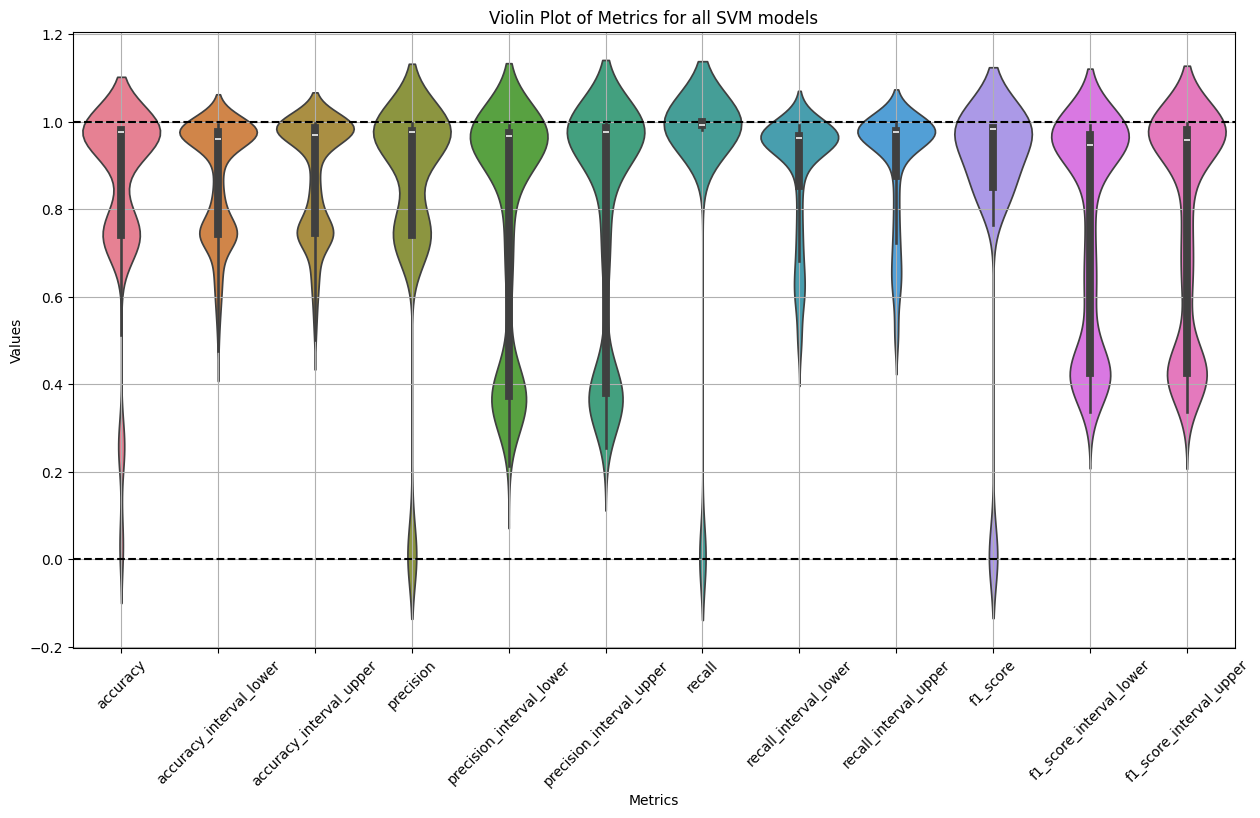

In [ ]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all SVM models
sns.violinplot(data=all_svm_df[all_svm_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all SVM models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

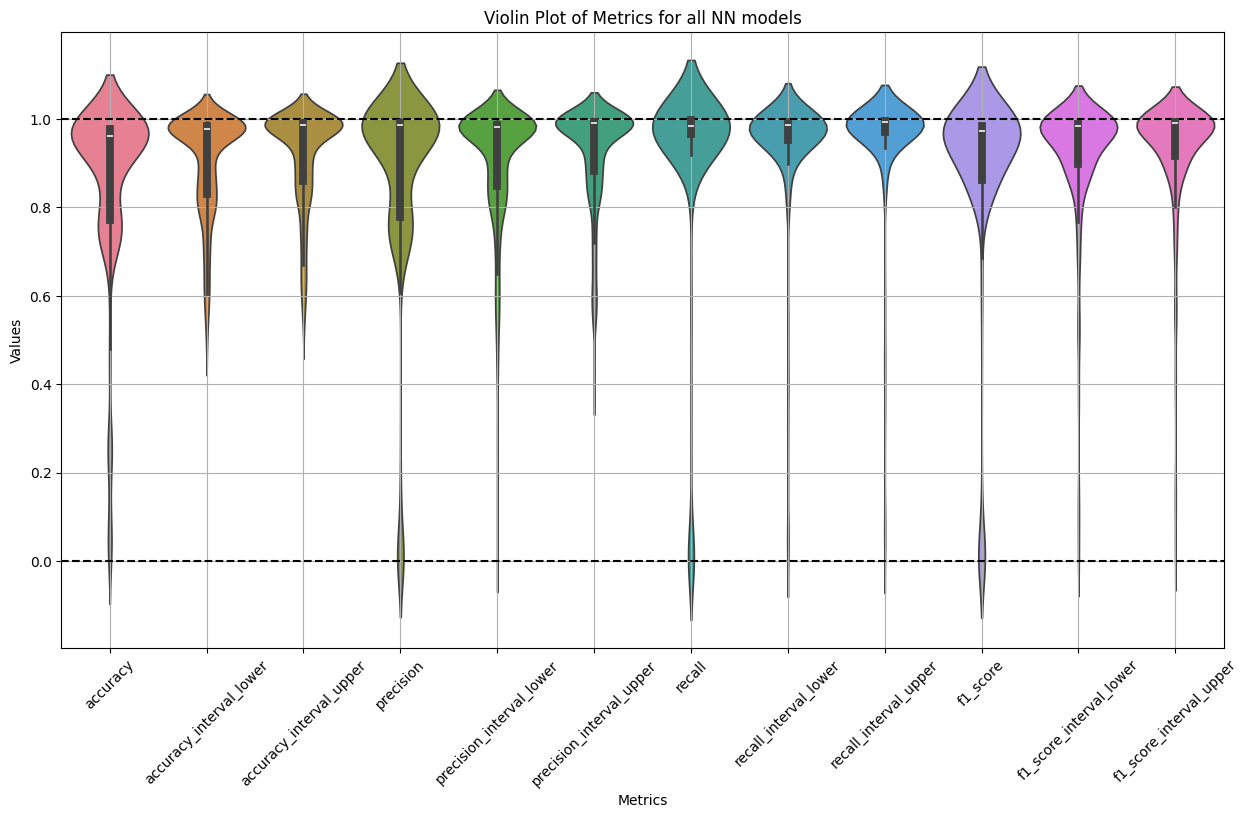

In [ ]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all NN models
sns.violinplot(data=all_nn_df[all_nn_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all NN models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

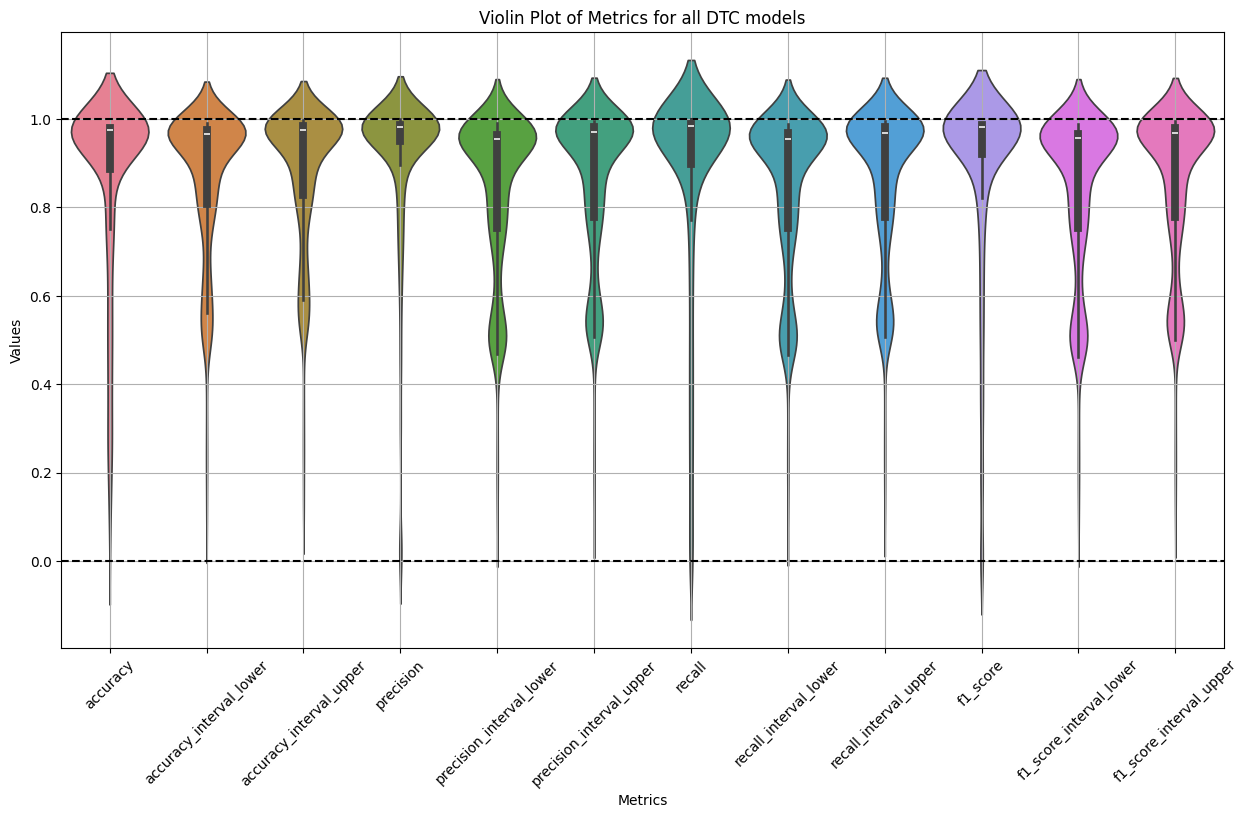

In [ ]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all DTC models
sns.violinplot(data=all_dtc_df[all_dtc_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all DTC models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Accuracy for each Sub-DataFrame

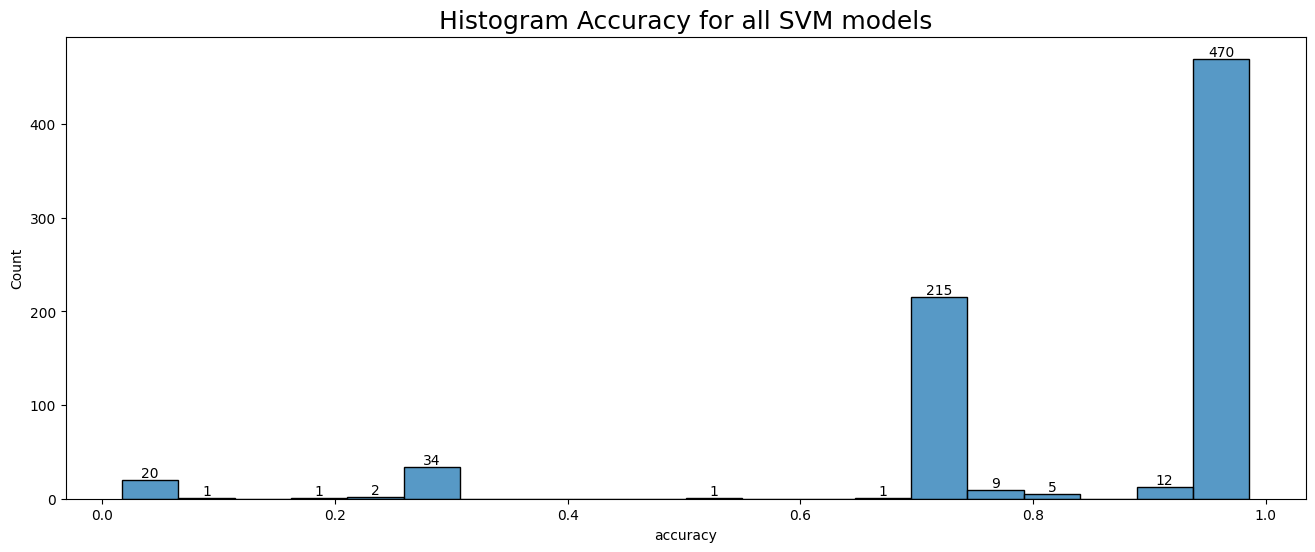

In [ ]:
# Histogram Accuracy all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['accuracy'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

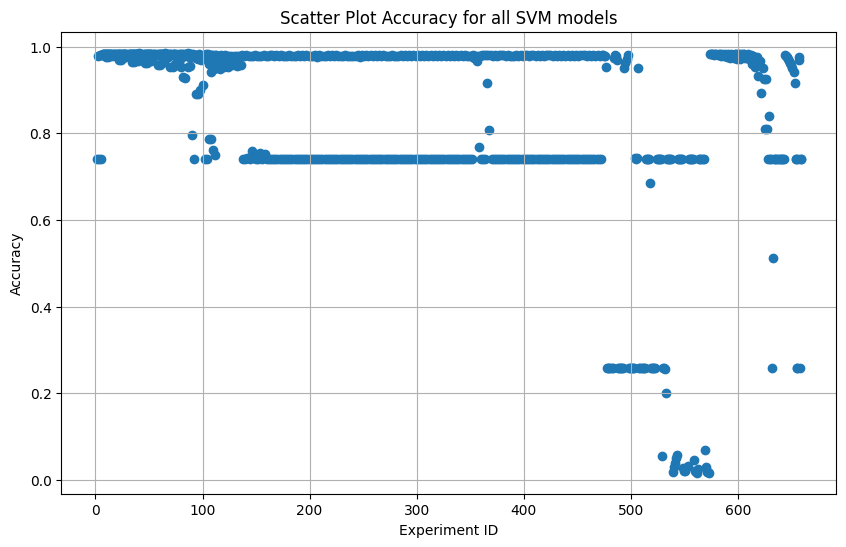

In [ ]:
# Scatter plot for all SVM accuracies
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['accuracy'])

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all SVM models')
plt.grid(True)
plt.show()

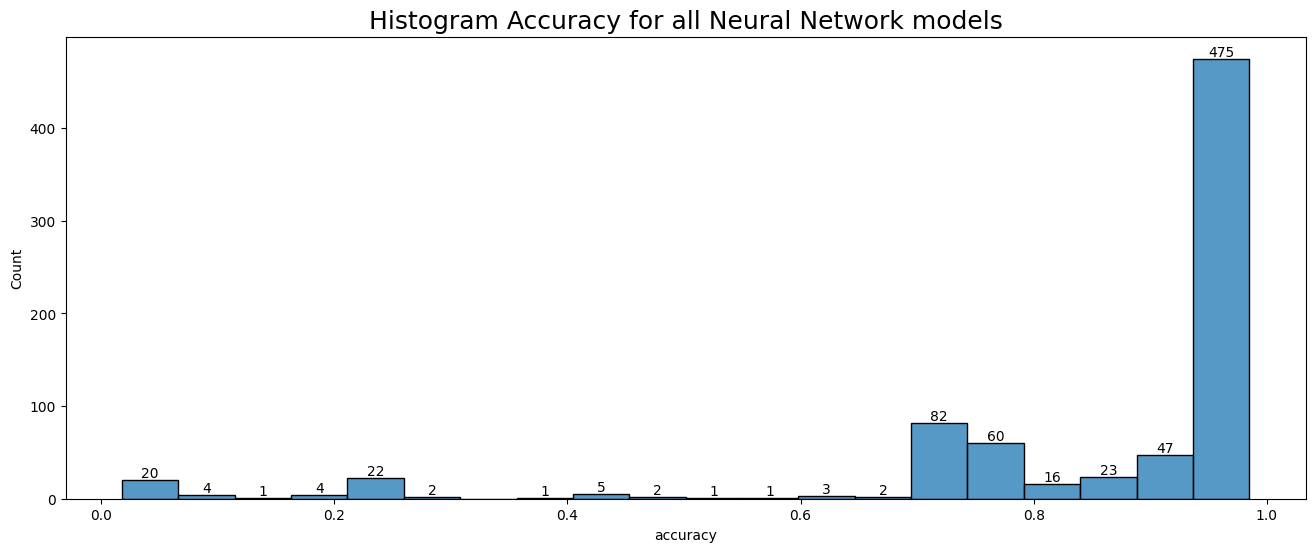

In [ ]:
# Histogram Accuracy all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all Neural Network models", size=18)
ax = sns.histplot(x=all_nn_df['accuracy'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

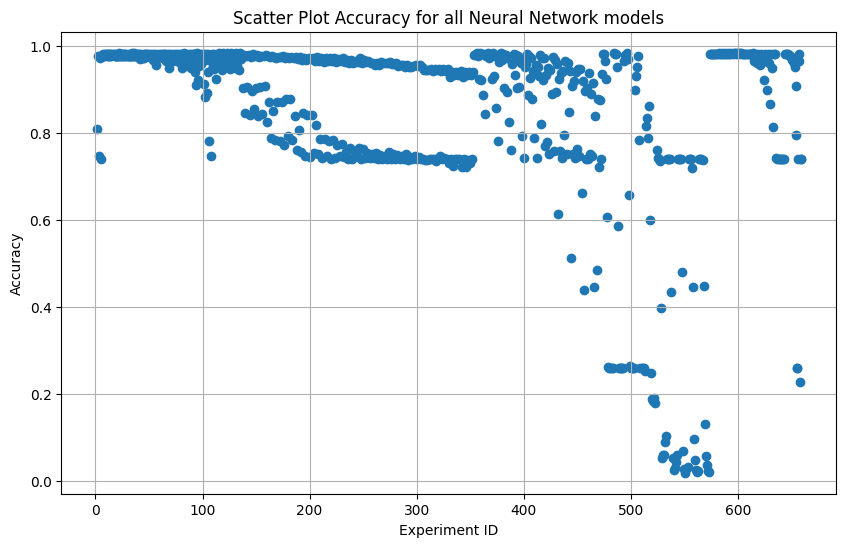

In [ ]:
# Scatter plot for all NN accuracies
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['accuracy'])

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all Neural Network models')
plt.grid(True)
plt.show()

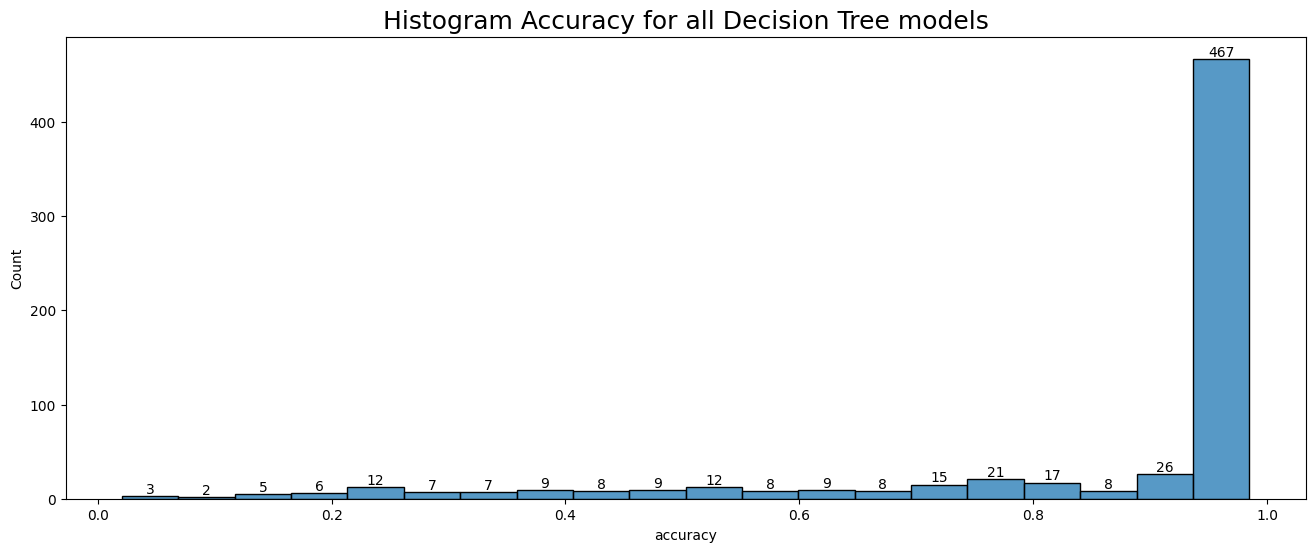

In [ ]:
# Histogram Accuracy all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['accuracy'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

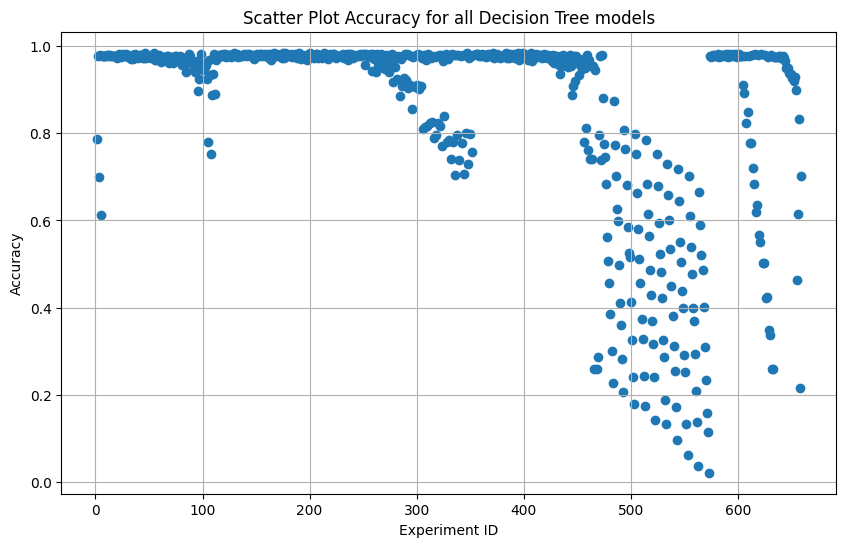

In [ ]:
# Scatter plot for all DTC accuracies
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['accuracy'])

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all Decision Tree models')
plt.grid(True)
plt.show()

Idee future:

- Completare grafici di adesso con altre metriche
- Fare qualcosa su intervalli di confidenza
- Correlazioni modelli (es. SVM fa schifo quando fa schifo Rete?), se inutile lo togliamo
- Confrontare modelli mean e modelli EM per vedere se per i missing values EM è effettivamente meglio
- Spider plot per gruppi, es. 3 spider plot fatti così:
   - 3 tipi SVM, usare mediana o media o qualcosa che riassume le metriche per ognuno
   - 3 tipi NN, usare mediana o media o qualcosa che riassume le metriche per ognuno
   - 1 tipo DTC
- Potremmo provare a mano a trovare i singoli esperimenti che producono i valori minimi per ogni modello ed analizzarli
- Fare grafici divisi per tipologia di esperimento (drop features, missing values, ... e anche combo)
- Grafici del prof (es. 10% 20% ... 100% completezza)
- Eventuali altre idee

### Recall for each Sub-DataFrame

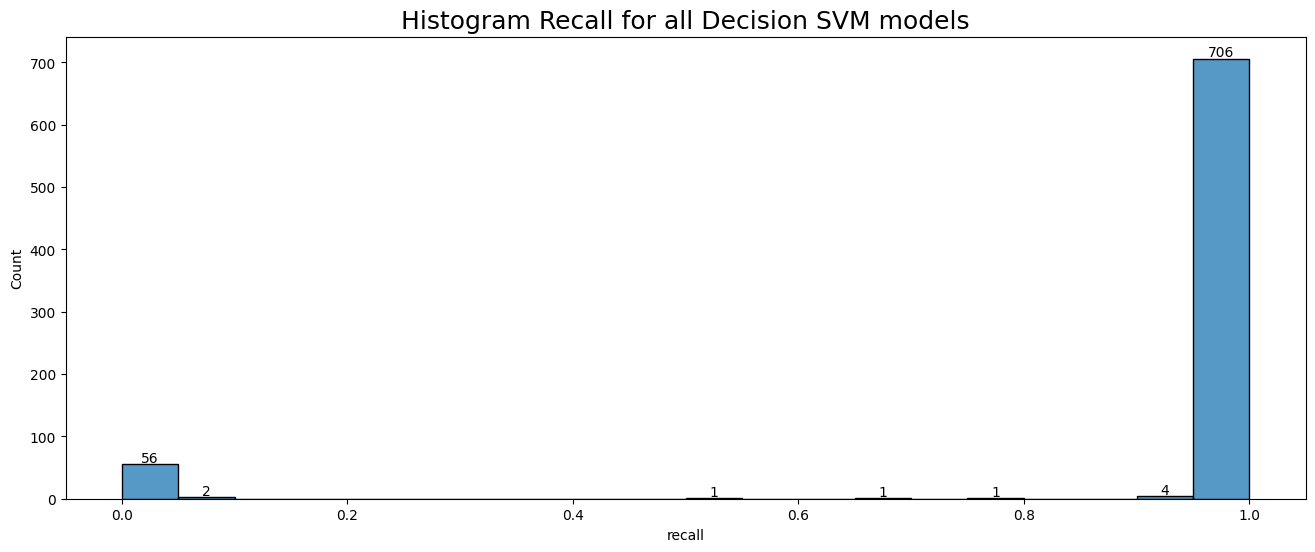

In [21]:
# Histogram recall all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['recall'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

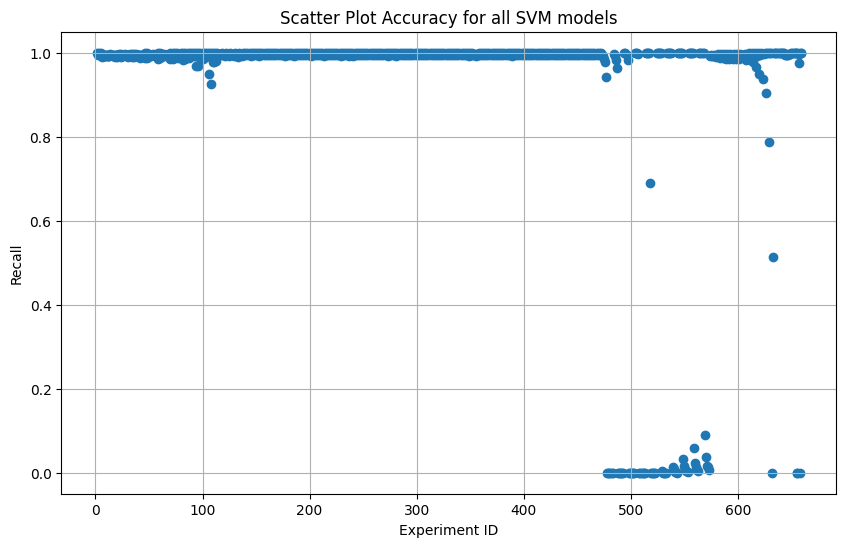

In [22]:
# Scatter plot for all SVM recall
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['recall'])

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot Accuracy for all SVM models')
plt.grid(True)
plt.show()

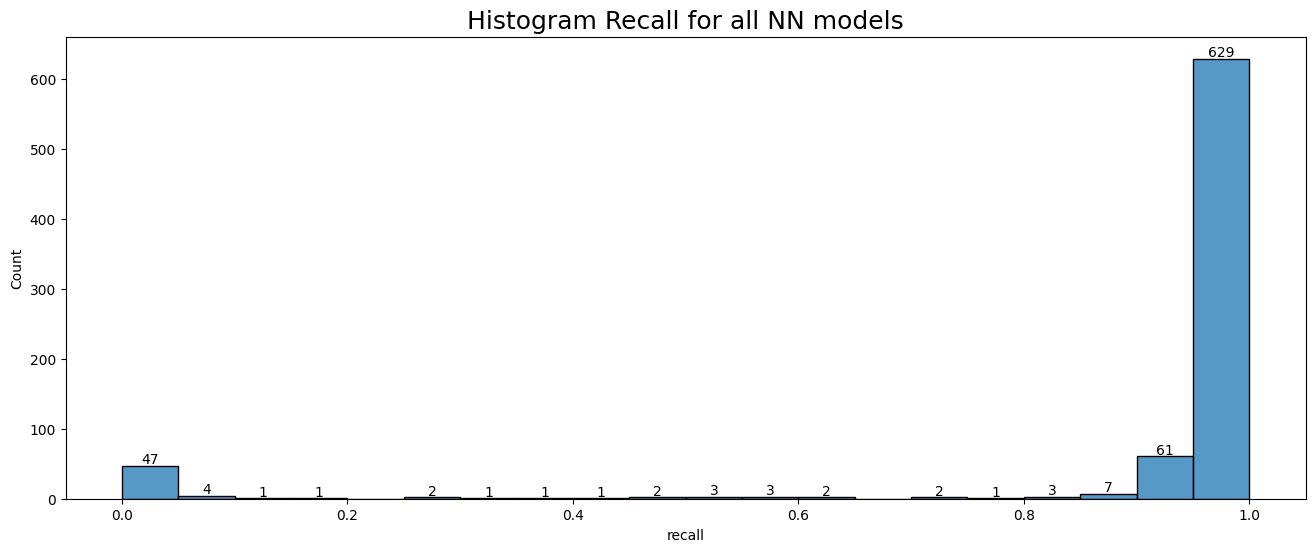

In [23]:
# Histogram recall all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all NN models", size=18)
ax = sns.histplot(x=all_nn_df['recall'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

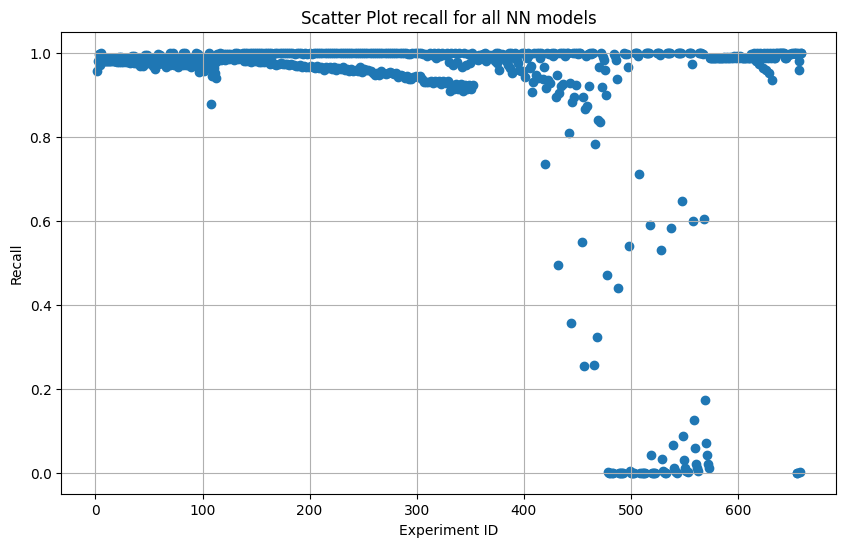

In [25]:
# Scatter plot for all NN recall
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['recall'])

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot recall for all NN models')
plt.grid(True)
plt.show()

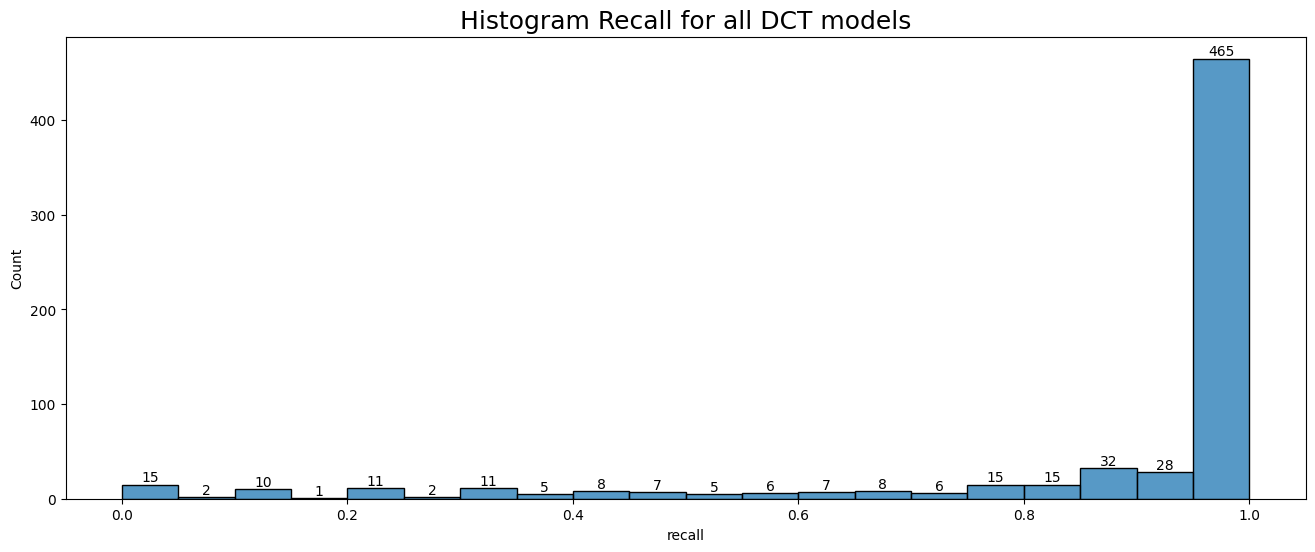

In [26]:
# Histogram recall all DCT models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all DCT models", size=18)
ax = sns.histplot(x=all_dtc_df['recall'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

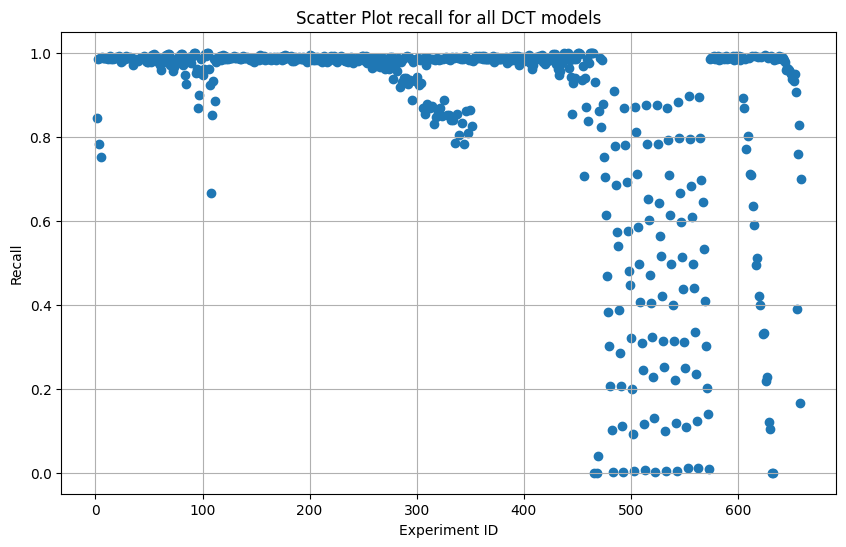

In [27]:
# Scatter plot for all DCT recall
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['recall'])

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot recall for all DCT models')
plt.grid(True)
plt.show()

### F1 score for each Sub-DataFrame

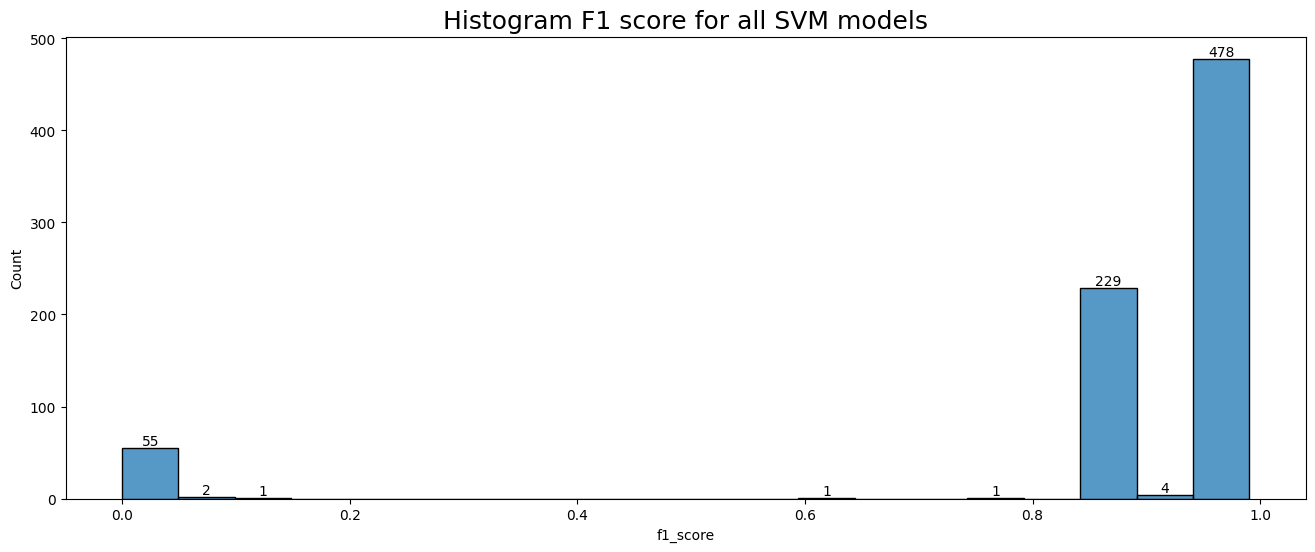

In [28]:
# Histogram F1 score all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['f1_score'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

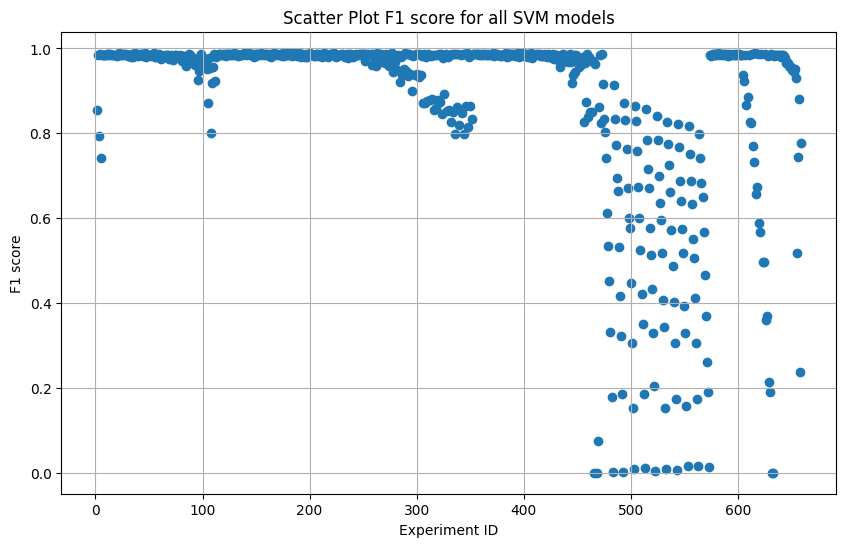

In [29]:
# Scatter plot for all DCT F1 score
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['f1_score'])

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all SVM models')
plt.grid(True)
plt.show()

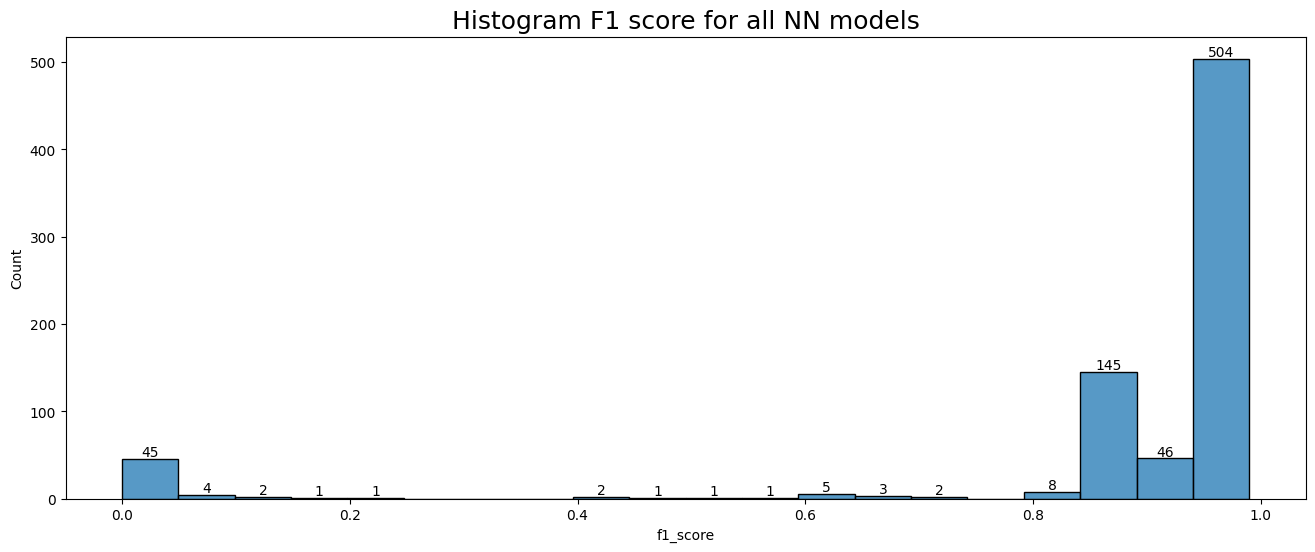

In [30]:
# Histogram F1 score all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all NN models", size=18)
ax = sns.histplot(x=all_nn_df['f1_score'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

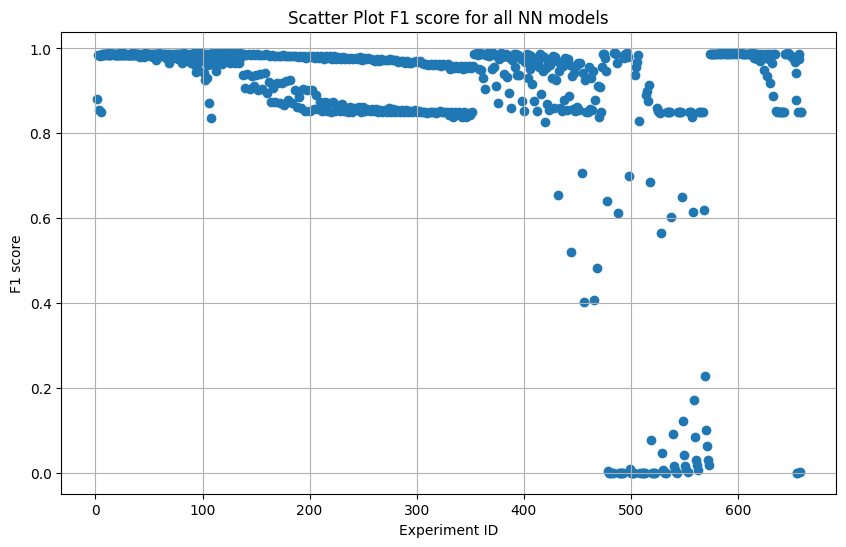

In [31]:
# Scatter plot for all NN F1 score
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['f1_score'])

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all NN models')
plt.grid(True)
plt.show()

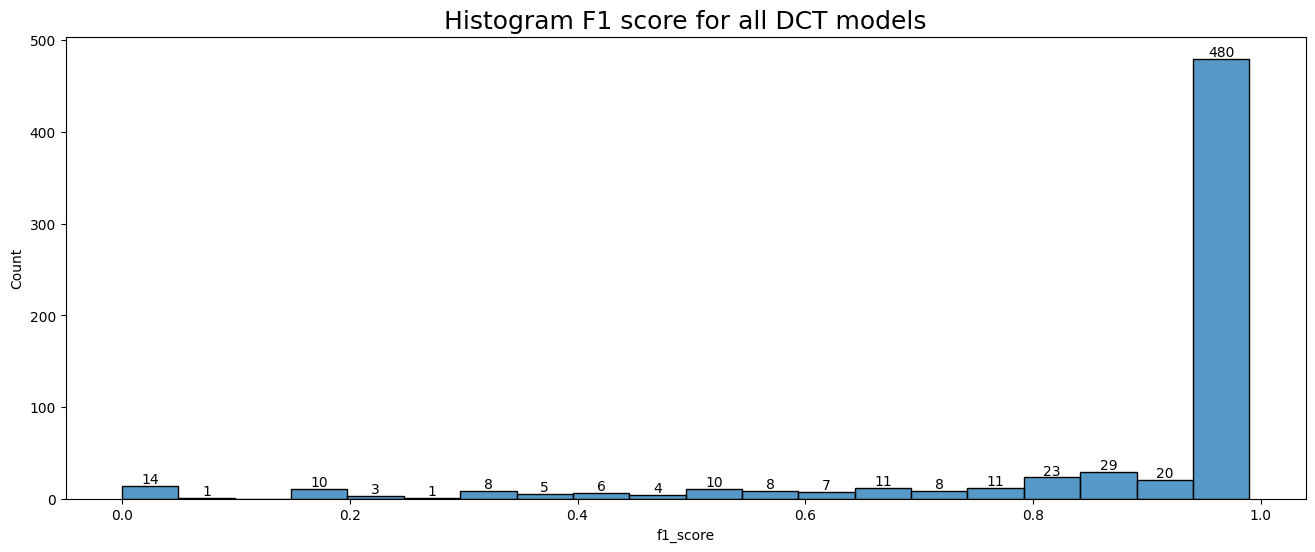

In [32]:
# Histogram F1 score all DCT models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all DCT models", size=18)
ax = sns.histplot(x=all_dtc_df['f1_score'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

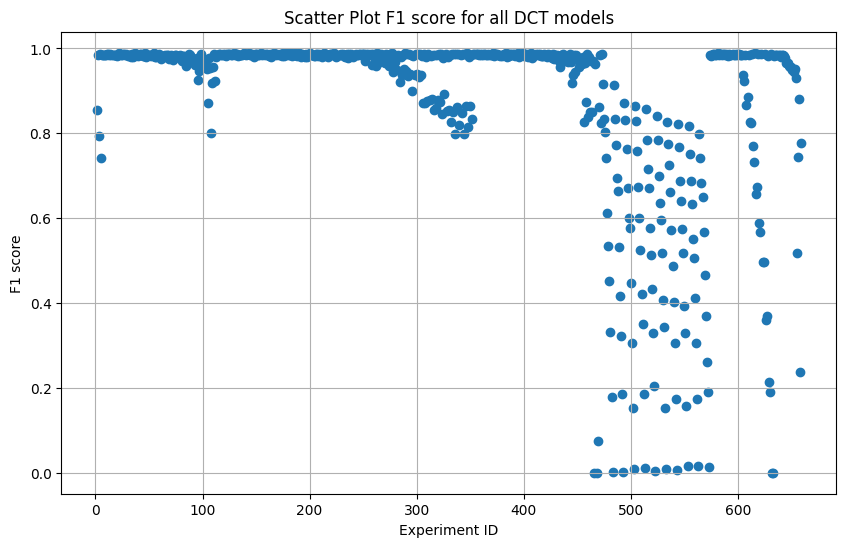

In [33]:
# Scatter plot for all DCT F1 score
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['f1_score'])

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all DCT models')
plt.grid(True)
plt.show()

### Precision for each Sub-DataFrame

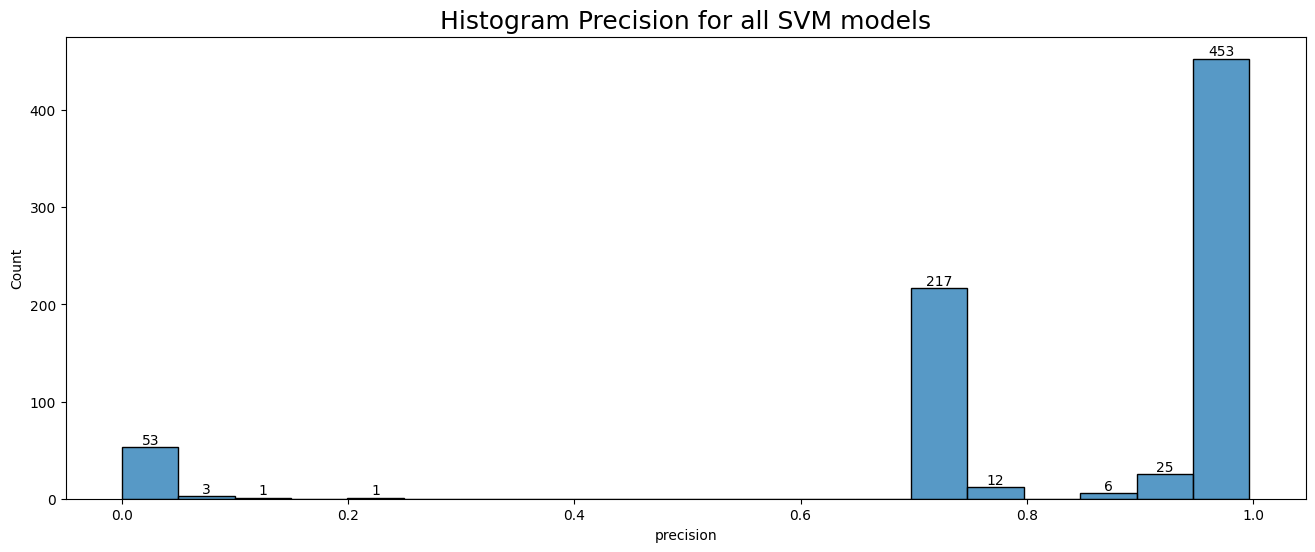

In [34]:
# Histogram Precision all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['precision'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

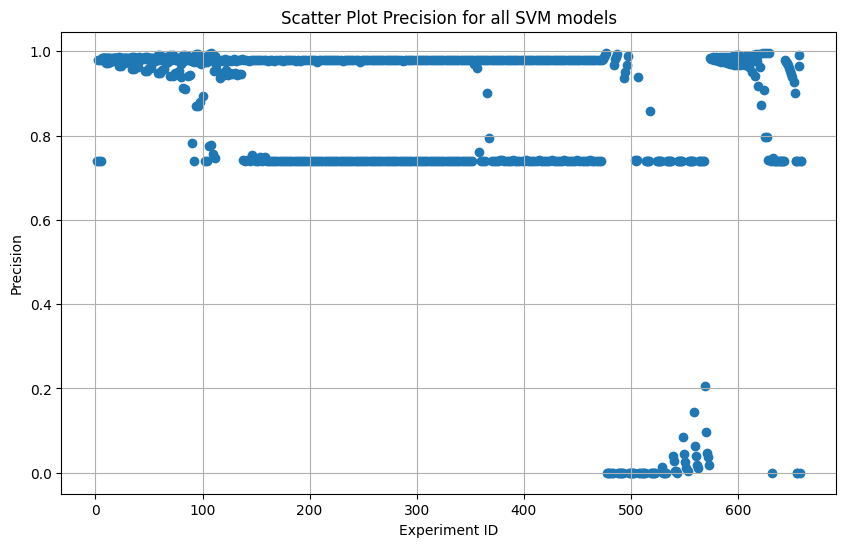

In [35]:
# Scatter plot for all SVM precisions
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['precision'])

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all SVM models')
plt.grid(True)
plt.show()

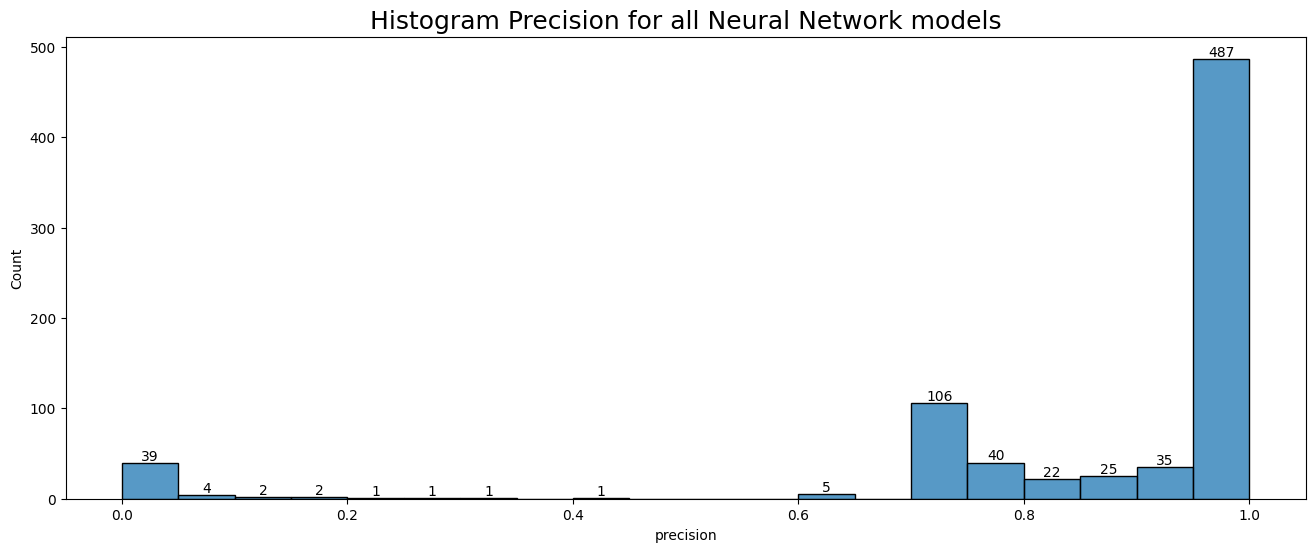

In [36]:
# Histogram Precision all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all Neural Network models", size=18)
ax = sns.histplot(x=all_nn_df['precision'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

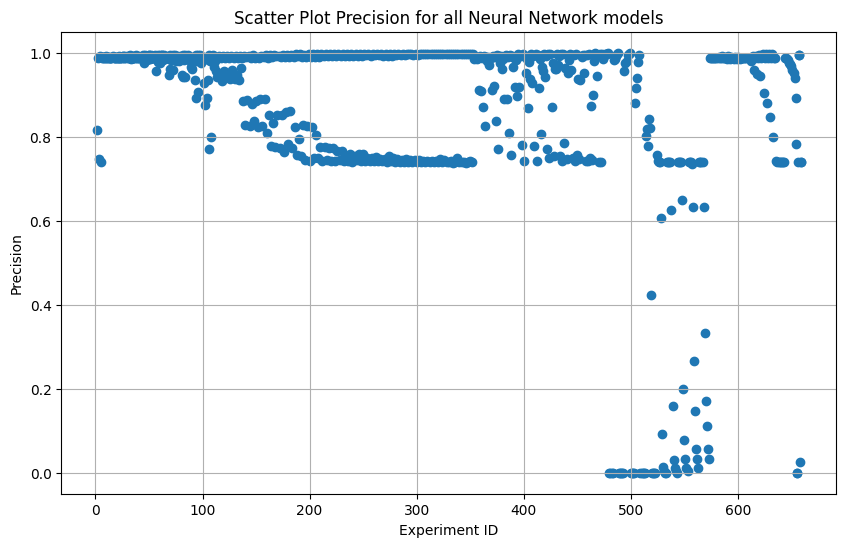

In [37]:
# Scatter plot for all NN precisions
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['precision'])

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all Neural Network models')
plt.grid(True)
plt.show()

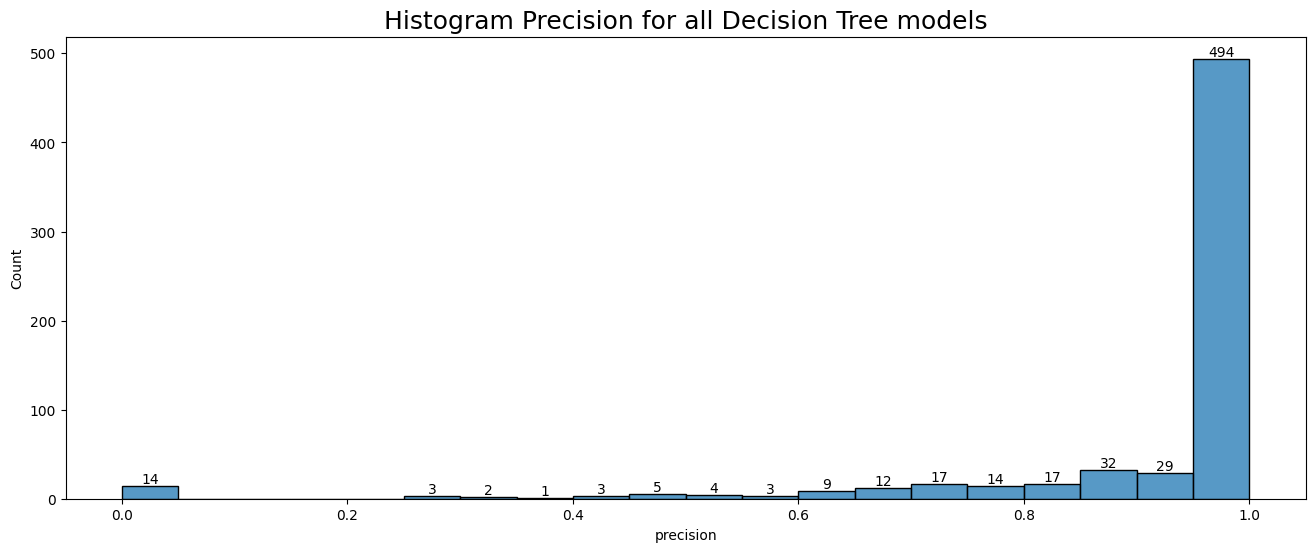

In [38]:
# Histogram Precision all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['precision'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

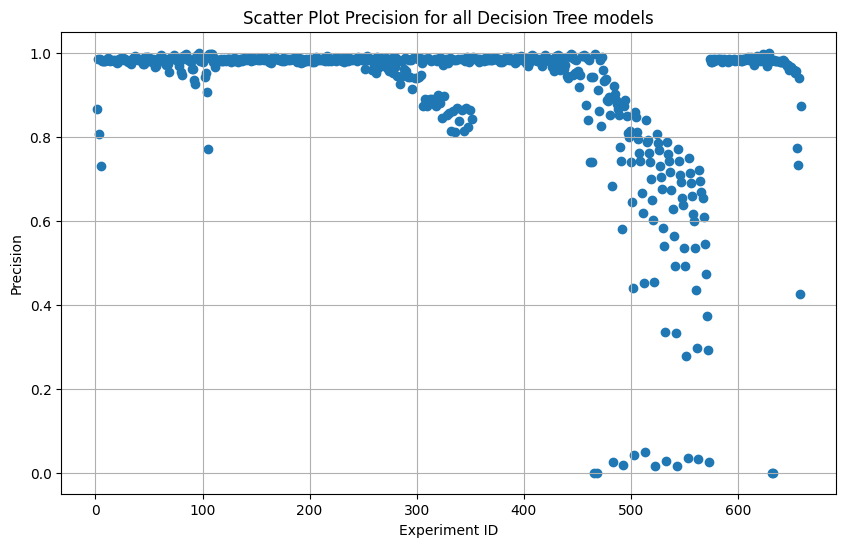

In [39]:
# Scatter plot for all DTC precisions
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['precision'])

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all Decision Tree models')
plt.grid(True)
plt.show()